**Определение перспективного тарифа для телеком-компании**
---

_____
**Описание исследования.**

Компания «Мегалайн» — федеральный оператор сотовой связи, предлагает два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
_____
**Цель исследования.**
    
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
    
_____
**Задачи исследования.**

- Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
- Рассчитать среднее количество, дисперсию и стандартное отклонение;
- Построить гистограммы и описать распределения этих парраметров;
- Проверить гипотезы:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

_____
**Исходные данные.**
    
- Таблица users (информация о пользователях);
- Таблица calls (информация о звонках);
- Таблица messages (информация о сообщениях);
- Таблица internet (информация об интернет-сессиях);
- Таблица tariffs (информация о тарифах).


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial 
import numpy as np
import math

calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv', index_col = 0)
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
def inform(data): # объявим функцию для вывода первых строк и общей информации о файле
    display(data.head())
    print(data.info())

In [3]:
inform(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [4]:
inform(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None


In [5]:
inform(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [6]:
inform(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [7]:
inform(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


### Вывод

У нас в распоряжении данные о пользователях сотовой связи. В пяти таблицах представлены данные о 500 пользователях и о их звонках, сообщениях, интернет тарфике и о тарифах, которыми они пользуются.

Описание данных:  

Таблица `users` (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана  

Таблица `calls` (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок  

Таблица `messages` (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение  

Таблица `internet` (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя  

Таблица `tariffs` (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В некотрых столбцах необходимо изменить тип данных, убрать ошибки.

## Предобработка данных

### Замена типа данных

**Обработаем таблицу со звонками пользователей**

Приведем значения в столбце "дата звонка" к типу datetime:

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Округлим минуты до целого. Так как оператор всегда округляет секунды до минут, т.е. любая дробная часть превращается в дополнительную минуту. Применим метод math.ceil(), который округляет число в большую сторону.

In [9]:
calls['duration'] = calls['duration'].apply(lambda x : math.ceil(x))

In [10]:
calls.head() # Проверим как округлились значения

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


**Обработаем таблицу с интернет сессиями пользователей**

Приведем значения в столбце "дата интернет сессии" к типу datetime:

In [11]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [12]:
internet.head() # Посмотрим как округлились данные в столбце с объемом трафика.

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


**Обработаем таблицу с сообщениями пользователей**

Приведем значения в столбце "дата сообщения" к типу datetime:

In [13]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


**Обработаем таблицу с информацией о пользователях**

Приведем значения в столбце "дата подключения к тарифу" к типу datetime:

In [15]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


В столбце `churn_date` (Дата прекращения пользования тарифа) есть пропущенные значения, но мы знаем что пропущенные значения означают что тариф еще действует.

### Подсчет дополнительных параметров

**Нам необходимо посчитать для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Эти данные мы возьмем из таблицы `calls`.**

Добавим столбец с месяцем звонка в таблице.

In [17]:
calls['month'] = calls['call_date'].dt.month 

Создадим сводную таблицу по пользователям и месяцу.

In [18]:
calls_pivot = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum'])
calls_pivot = calls_pivot.reset_index()
calls_pivot.columns = ['user_id','month', 'calls_count', 'calls_duration']
calls_pivot 

,user_id,month,calls_count,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


**Аналогичную сводную таблицу сделаем для таблицы с интернет трафиком и количеством сообщений**

In [19]:
internet['month'] = internet['session_date'].dt.month

In [20]:
internet_pivot = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_pivot = internet_pivot.reset_index()
internet_pivot 

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [21]:
messages['month'] = messages['message_date'].dt.month

In [22]:
messages_pivot = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_pivot = messages_pivot.reset_index()
messages_pivot.set_axis(['user_id','month','sms_count'],axis = 'columns',inplace = True)
messages_pivot

,user_id,month,sms_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


**Объединим три таблицы с подсчетами в одну общую. Способ объединения будем использовать 'outer', чтобы не потерять данные. Так как пользователи по-разному пользуются интернетом, звонками, сообщениями и в разные периоды могут чем-то не пользоваться. Важно собрать данные из всех таблиц.**

In [23]:
calls_internet = calls_pivot.merge(internet_pivot, on = ['user_id','month'], how='outer')

In [24]:
calls_internet_sms = calls_internet.merge(messages_pivot, on = ['user_id','month'], how='outer')

In [25]:
calls_internet_sms = calls_internet_sms.fillna(0)
calls_internet_sms

,user_id,month,calls_count,calls_duration,mb_used,sms_count
0,1000,5,22.00,159.00,2253.49,22.00
1,1000,6,43.00,172.00,23233.77,60.00
2,1000,7,47.00,340.00,14003.64,75.00
3,1000,8,52.00,408.00,14055.93,81.00
4,1000,9,58.00,466.00,14568.91,57.00
...,...,...,...,...,...,...
3209,1489,8,0.00,0.00,11050.56,17.00
3210,1489,9,0.00,0.00,17206.30,32.00
3211,1489,10,0.00,0.00,19559.44,21.00
3212,1489,11,0.00,0.00,17491.56,20.00


Переведем использованный трафик в месяц в Гб и округлим в большую сторону в соответствии с политикой оператора.

In [26]:
calls_internet_sms['mb_used'] = calls_internet_sms['mb_used'].apply(lambda x : math.ceil(x / 1024)) 
calls_internet_sms

,user_id,month,calls_count,calls_duration,mb_used,sms_count
0,1000,5,22.00,159.00,3,22.00
1,1000,6,43.00,172.00,23,60.00
2,1000,7,47.00,340.00,14,75.00
3,1000,8,52.00,408.00,14,81.00
4,1000,9,58.00,466.00,15,57.00
...,...,...,...,...,...,...
3209,1489,8,0.00,0.00,11,17.00
3210,1489,9,0.00,0.00,17,32.00
3211,1489,10,0.00,0.00,20,21.00
3212,1489,11,0.00,0.00,18,20.00


In [27]:
calls_internet_sms = calls_internet_sms.rename(columns={'mb_used': 'gb_used'})
calls_internet_sms

,user_id,month,calls_count,calls_duration,gb_used,sms_count
0,1000,5,22.00,159.00,3,22.00
1,1000,6,43.00,172.00,23,60.00
2,1000,7,47.00,340.00,14,75.00
3,1000,8,52.00,408.00,14,81.00
4,1000,9,58.00,466.00,15,57.00
...,...,...,...,...,...,...
3209,1489,8,0.00,0.00,11,17.00
3210,1489,9,0.00,0.00,17,32.00
3211,1489,10,0.00,0.00,20,21.00
3212,1489,11,0.00,0.00,18,20.00


**Чтобы подсчитать выручку по каждому пользователю нам нужно название тарифа и информация о тарифе.**

Создадим таблицу 'user_id - tariff' и присоединим ее к нашей таблице .

In [28]:
user_tariff = users.loc[:, ['user_id', 'tariff']]

In [29]:
calls_internet_sms_t = calls_internet_sms.merge(user_tariff, on = 'user_id', how='left')

In [30]:
calls_internet_sms_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_count     3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   gb_used         3214 non-null   int64  
 5   sms_count       3214 non-null   float64
 6   tariff          3214 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 200.9+ KB


In [31]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Округлим Мб в данных о тарифах в Гб, чтобы можно было сравнивать параметры.

In [32]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
tariffs = tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.00,500,550,200,3,3,smart
1,1000,30.00,3000,1950,150,1,1,ultra


Присоединим данные о тарифе к таблице с расчетами.

In [33]:
cis = calls_internet_sms_t.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')
cis

,user_id,month,calls_count,calls_duration,gb_used,sms_count,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.00,159.00,3,22.00,ultra,1000,30.00,3000,1950,150,1,1,ultra
1,1000,6,43.00,172.00,23,60.00,ultra,1000,30.00,3000,1950,150,1,1,ultra
2,1000,7,47.00,340.00,14,75.00,ultra,1000,30.00,3000,1950,150,1,1,ultra
3,1000,8,52.00,408.00,14,81.00,ultra,1000,30.00,3000,1950,150,1,1,ultra
4,1000,9,58.00,466.00,15,57.00,ultra,1000,30.00,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.00,0.00,11,17.00,smart,50,15.00,500,550,200,3,3,smart
3210,1489,9,0.00,0.00,17,32.00,smart,50,15.00,500,550,200,3,3,smart
3211,1489,10,0.00,0.00,20,21.00,smart,50,15.00,500,550,200,3,3,smart
3212,1489,11,0.00,0.00,18,20.00,smart,50,15.00,500,550,200,3,3,smart


Создадим функцию для подсчета выручки по каждому пользователю. Посчитаем абонентскую плату и стоимость сверхлимитных минут, гб, смс, если они были.

In [34]:
def income(df):
    
    result = df['rub_monthly_fee']            
    
    if df['calls_duration'] > df['minutes_included']:
        result = result + ((df['calls_duration'] - df['minutes_included']) * df['rub_per_minute'])
    
    if df['gb_used'] > df['gb_per_month_included']:
        result = result + ((df['gb_used'] - df['gb_per_month_included']) * df['rub_per_gb'])
    
    if df['sms_count'] > df['messages_included']:
        result = result + ((df['sms_count'] - df['messages_included']) * df['rub_per_message'])
    return result

Добавим новый столбец с выручкой по каждому клиенту и месяцу.

In [35]:
cis['income'] = cis.apply(income, axis=1)

In [36]:
cis.head(10)

,user_id,month,calls_count,calls_duration,gb_used,sms_count,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,income
0,1000,5,22.00,159.00,3,22.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
1,1000,6,43.00,172.00,23,60.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
2,1000,7,47.00,340.00,14,75.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
3,1000,8,52.00,408.00,14,81.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
4,1000,9,58.00,466.00,15,57.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
5,1000,10,57.00,350.00,15,73.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
6,1000,11,43.00,338.00,15,58.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
7,1000,12,46.00,333.00,10,70.00,ultra,1000,30.00,3000,1950,150,1,1,ultra,1950.00
8,1001,11,59.00,430.00,18,0.00,smart,50,15.00,500,550,200,3,3,smart,1150.00
9,1001,12,63.00,414.00,14,0.00,smart,50,15.00,500,550,200,3,3,smart,550.00


Получили таблицу с данными об использовании услуг связи и выручке по каждому пользователю в разрезе месяцев.

## Анализ данных

Проанализируем пользователей этих тарифов. Посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Для этого построим сводную таблицу по тарифу и пользователю. Посчитаем медианное значение по всем мясяцам каждого показателя. Возьмем медиану чтобы исключить влияние выбросов.

In [37]:
df_hist = cis.pivot_table(index=['tariff','user_id'], values=['calls_duration','gb_used', 'sms_count'], aggfunc='median')
df_hist = df_hist.reset_index()
df_hist.head(10)

,tariff,user_id,calls_duration,gb_used,sms_count
0,smart,1001,422.00,16.00,0.00
1,smart,1002,214.00,18.00,11.00
2,smart,1005,593.50,8.00,49.00
3,smart,1006,356.00,16.00,0.00
4,smart,1007,480.00,15.00,26.00
5,smart,1008,339.00,13.00,56.00
6,smart,1009,221.00,18.00,12.00
7,smart,1010,245.00,16.00,0.00
8,smart,1011,454.50,18.50,12.50
9,smart,1012,226.50,22.00,14.50


Посмотрим на основные параметры пользователей всех тарифов.

In [38]:
pd.set_option('display.float_format', '{:.0f}'.format)
df_hist.loc[:,['calls_duration','gb_used', 'sms_count']].describe()

,calls_duration,gb_used,sms_count
count,498,498,498
mean,473,18,41
std,220,6,37
min,0,0,0
25%,325,14,12
50%,462,18,32
75%,591,21,60
max,1273,39,197


Видим что в среднем пользователи в месяц выговаривают 473 минуты, отправляют 41 смс и тратят 18 Гб интернет трафика. Но большинство укладываются в 590 минут, 21 Гб и 60 смс. Среднее значение минут и смс больше медианы этих значений,  значит распределения значений скошены вправо. А вот среднее и медиана использованных Гб равны, т.е. они распределены равномерно в обе стороны.  

А теперь посмотрим как пользуются услугами связи пользователи разных тарифов:

In [39]:
print('Средние значения длительности звонков, потребления трафика и количества сообщений:')
df_hist.pivot_table(index='tariff', values=['calls_duration','gb_used', 'sms_count'], aggfunc='mean')

Средние значения длительности звонков, потребления трафика и количества сообщений:


,calls_duration,gb_used,sms_count
tariff,,,
smart,437,17,34
ultra,558,20,57


Пользователи тарифа "Смарт" в среднем укладываются в лимит 500 мин и 50 сообщений, но лимита интернет трафика (15Гб) им не хватает, в среднем они используют 17 Гб. Похоже тариф smart был создан с расчетом на превышение пользователями лимитов.  

А вот пользователям тарифа "Ультра" требуется чуть больше минут, Гб и сообщенний, чем пользователям "Смарт", но они в среднем не используют свой лимит по полной. В среднем пользователи тарифа "Ультра" почти не используют лимит минут 558 из 3000, чуть лучше используют лимит смс 57 из 100, и лучше всего потребляют интернет 20 из 30 Гб.

In [40]:
print('Стандартное отклонение параметров длительности звонков, потребления трафика и количества сообщений:')
df_hist.pivot_table(index='tariff', values=['calls_duration','gb_used', 'sms_count'], aggfunc='std')

Стандартное отклонение параметров длительности звонков, потребления трафика и количества сообщений:


,calls_duration,gb_used,sms_count
tariff,,,
smart,160,4,28
ultra,304,9,49


Разброс значений по тарифу "Ультра" больше чем разброс значений по тарифу "Смарт".

In [41]:
df_hist.pivot_table(index='tariff', values=['calls_duration','gb_used', 'sms_count'], aggfunc=np.var)

,calls_duration,gb_used,sms_count
tariff,,,
smart,25685,17,785
ultra,92291,76,2424


Если стандартное отклонение выборок по тарифам отличается, то и дисперсия тоже будет. Ведь корень из дисперсии равен стандартному отклонению.

**Построим гистограммы для этих параметров.**

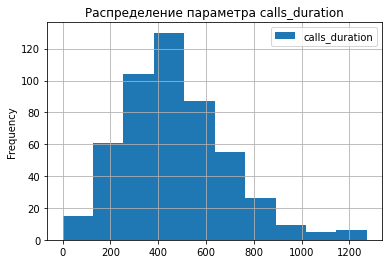

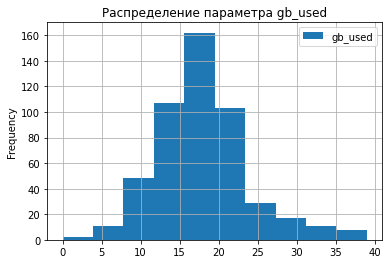

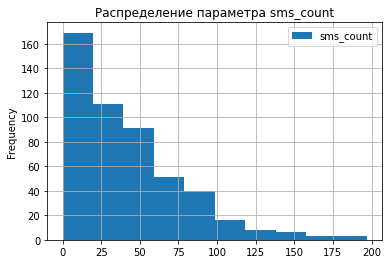

In [42]:
parameters = ['calls_duration','gb_used', 'sms_count']
for parameter in parameters:    
    df_hist.plot(kind='hist', y=parameter, grid=True, title=f"Распределение параметра {parameter}")
    plt.show()

Распределение параметров длительность звонков и потребление трафика стремятся к нормальному распределению. Теперь мы видим что распределения длительности звонков и количества сообщений скошенны вправо. А среднее и медиана использованного трафика, как помним, практически равны.

Сравним как распределяются эти параметры в разрезе тарифов:

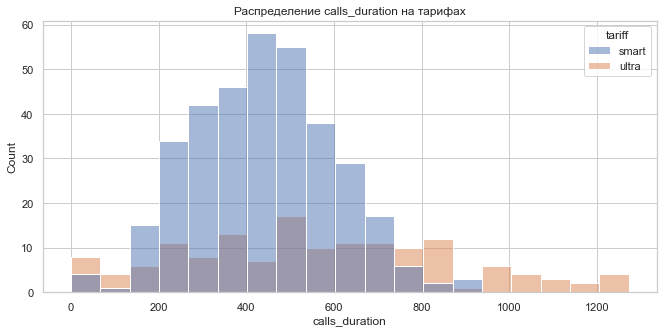

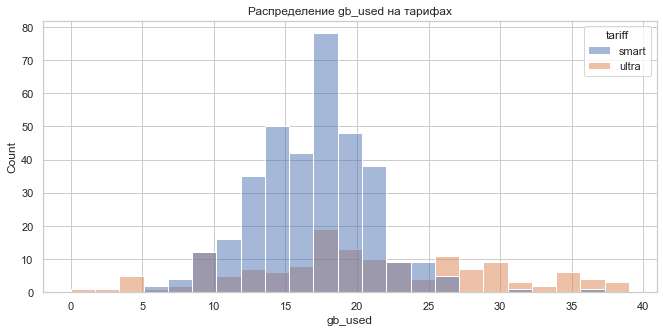

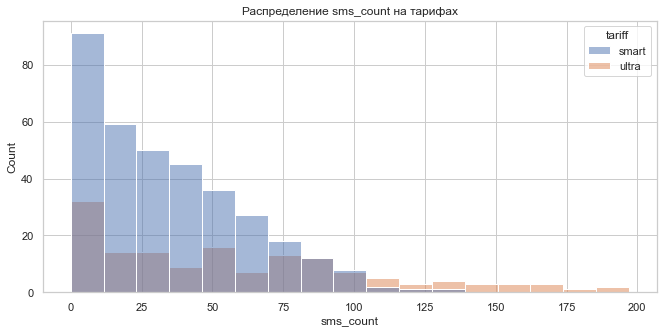

In [43]:
parameters = ['calls_duration','gb_used', 'sms_count']
sns.set_theme(style="whitegrid")
for parameter in parameters:    
    plt.figure(figsize=(11,5))
    sns.histplot(data=df_hist, x=parameter, hue='tariff')    
    plt.title(f"Распределение {parameter} на тарифах")
    plt.show()

Пользователи тарифа "Ультра" больше разговаривают . Гораздо лучше они пользуются интернетом самые частые значения от 16 до 23 Гб. Пользователи тарифа "Смарт" тоже любят интернет и тратят от 15 до 20 Гб в месяц, несмотря на лимит 15Гб. Сообщениями пользователи не особо пользуются и как правило укладываются в лимит сообщений: 50 смс для тарифа "Смарт", 100 смс для тарифа "Ультра".

**Выясним какой тариф приносит больше денег**

Посмотрим на разброс выручек пользователей разных тарифов. Построим диаграммы размаха.

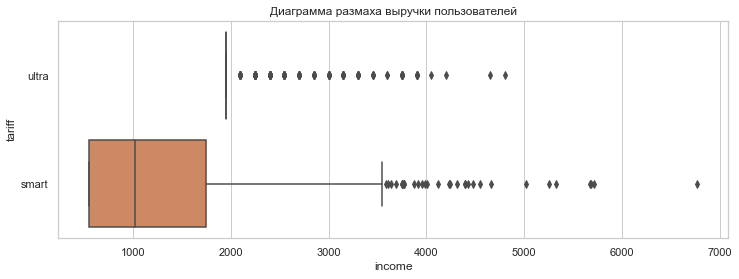

In [44]:
plt.figure(figsize=(12,4))
sns.boxplot(x=cis['income'], y=cis['tariff'])
plt.title('Диаграмма размаха выручки пользователей')
plt.show()

Мы видим, что достаточно мало пользователей тарифа "Ультра" приносят выручку больше абонентской платы - 1950, т.е. редко превышают лимиты по своему тарифу. Абонентская плата тарифа "Смарт" гораздо ниже - 550 руб, но и пользователи гораздо чаще превышают лимиты тарифа. А 75% значений лежит ниже 2000 руб. Но межквартильный размах смещен вправо и в нормальное распределение попадает достаточное много выручки выше 3000.  
Другими словами мы можем сказать что тариф "Смарт" для оператора более выгоден так как на этом тарифе будут пользователи, которые платят больше чем пользователи тарифа "Ультра". И скорее всего пользователей тарифа "Смарт", как более дешевого, должно быть больше.

## Проверка гипотез

### Двустороння проверка: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова}\\
   H_1 :\text{Средняя выручка пользователей тарифов «Ультра» и «Смарт» отличается}
 \end{cases}
\end{equation*}$


Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Подготовим две выборки. Выручка в месяц по каждому пользователю тарифов «Ультра» и «Смарт».

In [45]:
income_smart = cis[cis['tariff'] == 'smart']['income']
income_ultra = cis[cis['tariff'] == 'ultra']['income']

Мы сравниваем группы пользователей и мы знаем, что эти группы отличаются по всем другим параметрам. Соответственно, у нас есть серьезный повод сомневаться, что дисперсии данных выборок равны. Поэтому при использовании метода параметру equal_var передадим 'False'.

In [46]:
alpha = .05

results = st.ttest_ind(income_smart, income_ultra, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Вероятность что средние выручки равны слишком мала, поэтому мы можем сказать, что средняя выручка пользователей тарифов отличается.

### Двустороння проверка: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Подготовим две выборки. Выручка в месяц пользователей из Москвы и выручка в месяц пользователей из других регионов.

Добавим к нашей таблице, содержащей выручку по пользователям и месяцам, город проживания пользователя.  
Сделаем срезы с нужными столбцами и объединим их.

In [47]:
user_income = cis.loc[:,['user_id','month', 'income']]
user_city = users.loc[:,['user_id','city']]

In [48]:
user_city_income = user_income.merge(user_city, on = 'user_id', how='left')
user_city_income.head(10)

,user_id,month,income,city
0,1000,5,1950,Краснодар
1,1000,6,1950,Краснодар
2,1000,7,1950,Краснодар
3,1000,8,1950,Краснодар
4,1000,9,1950,Краснодар
5,1000,10,1950,Краснодар
6,1000,11,1950,Краснодар
7,1000,12,1950,Краснодар
8,1001,11,1150,Москва
9,1001,12,550,Москва


Сохраним выручку пользователей из Москвы и пользователей из других регионов.

In [49]:
user_moscow_income = user_city_income[user_city_income['city'] == 'Москва']['income']
user_reg_income = user_city_income[user_city_income['city'] != 'Москва']['income']

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей из Москвы и пользователей из других регионов одинакова}\\
   H_1 :\text{Средняя выручка пользователей из Москвы и пользователей из других регионов отличается}
 \end{cases}
\end{equation*}$


Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

 Пользователи из Москвы отличаются от пользователей из других регионов. Соответственно, у нас есть серьезный повод сомневаться, что дисперсии данных выборок равны. Поэтому при использовании метода параметру equal_var передадим 'False'.

In [50]:
alpha = .05

results = st.ttest_ind(user_moscow_income, user_reg_income, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Можем сделать вывод, что средняя выручка пользователей из Москвы и пользователей из других регионов принципиально не отличаются.

## Общий вывод

  Мы проанализировали данные 500 пользователей «Мегалайна», а именно: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый пользователь отправил за 2018 год.  
Анализ позволяет сделать следующие выводы.   
  Пользователям тарифа "Смарт" не хватает месячного лимита трафика и минут и им приходится платить за дополнительные минуты и Гб. Пользователи тарифа "Ультра", как правило, потребляют больше минут и Гб чем пользователи "Смарт", но очень редко превышают лимиты тарифа и ограничиваются абонентской платой. Для пользователей обоих тарифов характерно, что сообщениями они  пользуются редко и как правило укладываются в лимит сообщений, установленный их тарифами.  
  Поскольку пользователям тарифа "Смарт" не хватает лимита услуг и они готовы на дополнительные траты в месяц потенциально они могут приносить больше выручки чем пользователи тарифа "Ультра". Также анализ распределения ежемесячной выручки показал что достаточное количество пользователей тарифа "Смарт" платят в месяц больше чем пользователи тарифа "Ультра". Таким образом, выгоднее вложить рекламный бюджет в тариф "Смарт".  
  Также удалось выяснить, что средняя выручка пользователей из Москвы и пользователей из других регионов принципиально не отличаются.
